# Linear least-squares regression

- This notebook follows course notes `optimization-for-ml.pdf`

## Linear data

- We first consider the case wehre the data were generated from a model comprising the sum of a (deterministic) **linear** function and (stochastic) iid Gaussian noise:
$$y_i = f_{\mathrm{true}}(x_i)+ \sigma \cdot \epsilon_i$$

In [0]:
# set up python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plot properties
# use to create figures for tex
font = {'size'   : 12}
plt.rc('font', **font)
from cvxpy import *

In [0]:
# generate data
np.random.seed(1)
theta = 0.6
b = 0.3
sigma = .1
x = np.linspace(0,1,10)
y = theta*x + b + sigma*np.random.standard_normal(x.shape)
# compute range for plotting
axis_range = [-0.1,1.1,-0.1,1.1]

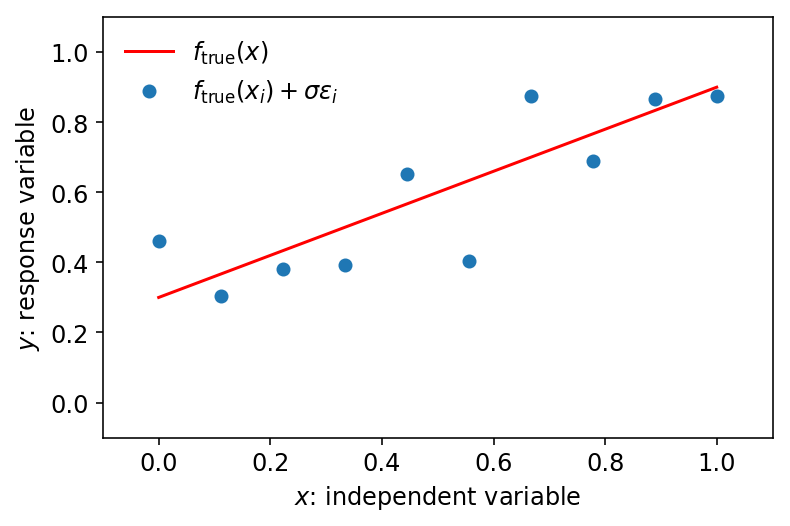

In [23]:
# plot figure with true line
y_true = theta*x + b

plt.figure()
plt.plot(x,y_true,'r',label='$f_\mathrm{true}(x)$')
plt.plot(x,y,'o',label='$f_\mathrm{true}(x_i)+ \sigma\epsilon_i$')
plt.legend(frameon=False)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)

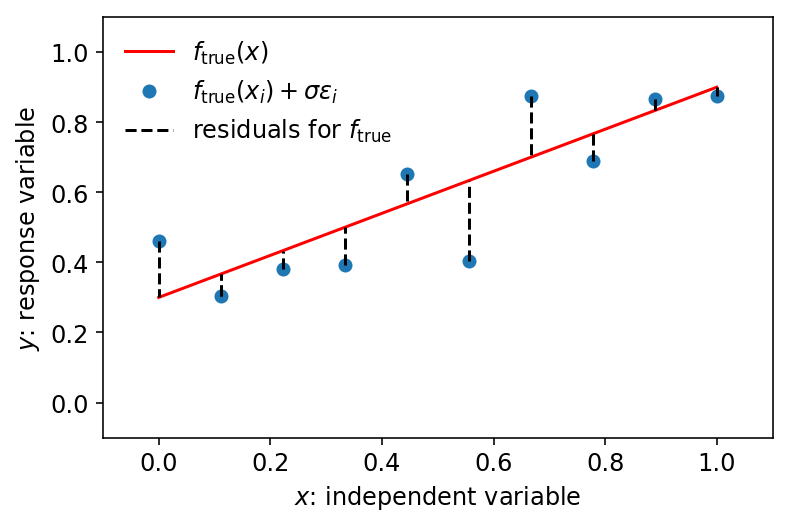

In [24]:
# plot figure with true line and residuals

y_true = theta*x + b

plt.figure()
plt.plot(x,y_true,'r',label='$f_\mathrm{true}(x)$')
plt.plot(x,y,'o',label='$f_\mathrm{true}(x_i)+ \sigma\epsilon_i$')

for i in range(x.size):
    if (i==1) : plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--',label='residuals for $f_\mathrm{true}$')
    plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--')
    
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(frameon=False)

In [0]:
# create objective-function data to visualize

def objective_fun(x,y,x_var_1,x_var_2):
    Atmp = np.vander(x,2)
    btmp = np.array(y)
    unknown_vec = np.array([[x_var_1], [x_var_2]])
    d =Atmp.dot(unknown_vec).T-btmp
    return np.linalg.norm(d)

Mone = np.arange(0, 1, 0.01)
Bone = np.arange(0, 1, 0.01)
M, B = np.meshgrid(Mone, Bone)
Z = np.zeros(M.shape)
for mcount in range(0,Mone.size):
    for bcount in range(0,Bone.size):
        Z[mcount,bcount] = objective_fun(x,y,M[mcount,bcount],B[mcount,bcount])

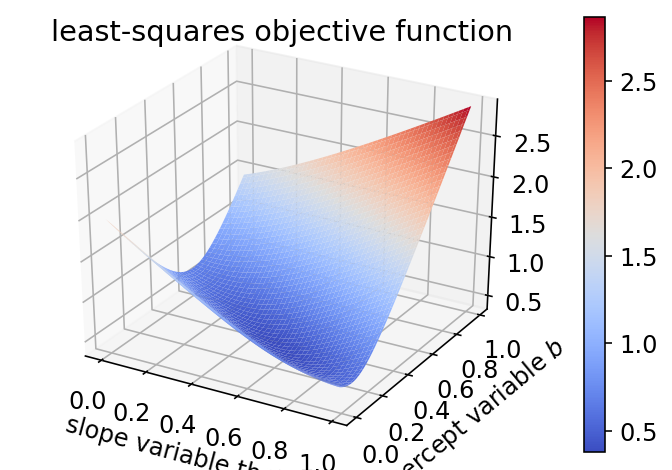

In [26]:
# generate surface plot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(M, B, Z, cmap=cm.coolwarm)

plt.xlabel('slope variable theta')
plt.ylabel('intercept variable $b$')
# Add a color bar which maps values to colors.
fig.colorbar(surf)
plt.title('least-squares objective function')
plt.show()


Text(0, 0.5, 'intercept variable $b$')

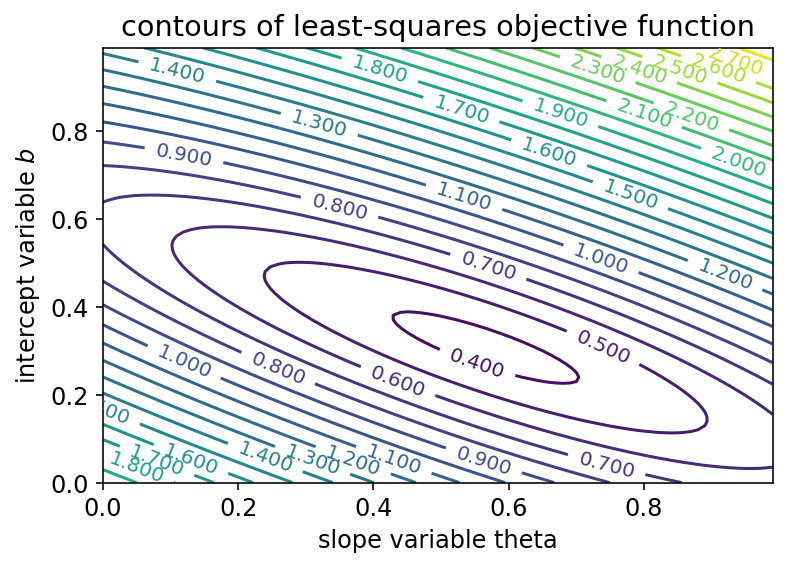

In [27]:
# generate contour plot

plt.figure()
contour_levels = np.arange(0.3,3,0.1)
CS = plt.contour(M, B, Z,levels=contour_levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('contours of least-squares objective function')

plt.xlabel('slope variable theta')
plt.ylabel('intercept variable $b$')

In [28]:
# solve via numpy covariance function

A = np.vstack((x,y))
V = np.cov(A)
theta_est = V[0,1] / V[0,0]
b_est = (y.sum() - theta_est*x.sum()) / len(x)
print('theta_est = {:.5}'.format(theta_est))
print('b_est = {:.5}'.format(b_est))

theta_est = 0.56604
b_est = 0.30727


0.3


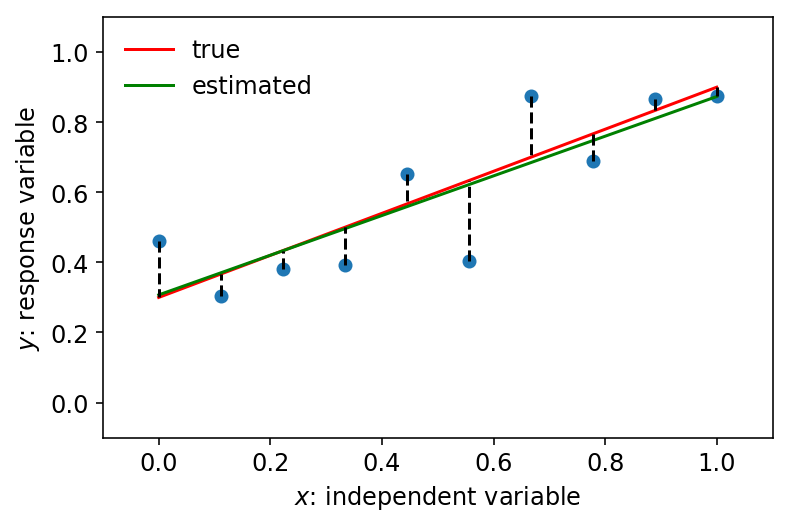

In [29]:
# plot figure with true and estimated model

y_true = theta*x + b
y_est = theta_est*x + b_est

print(b)
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y_true,'r',label='true')
plt.plot(x,y_est,'g',label='estimated')

for i in range(x.size):
    plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--')
    
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=4,fontsize=12)
plt.legend(frameon=False)
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)

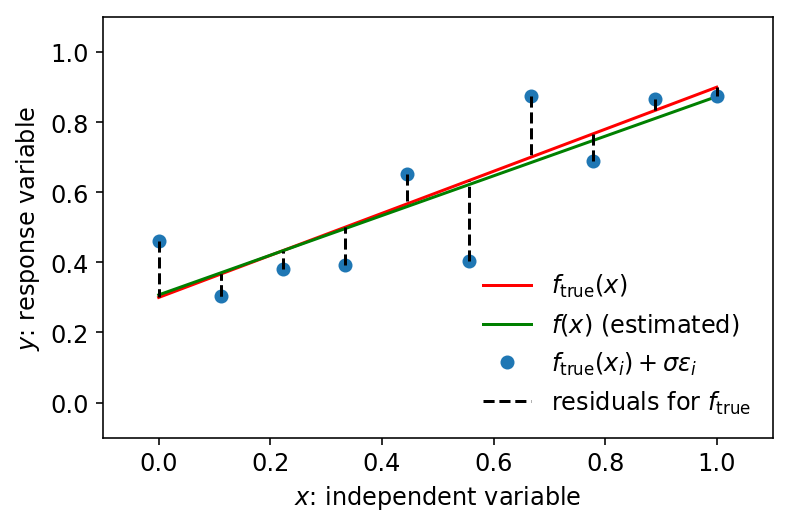

In [30]:
# plot figure with true line and residuals

y_true = theta*x + b
y_est = theta_est*x + b_est

plt.figure()
plt.plot(x,y_true,'r',label='$f_\mathrm{true}(x)$')
plt.plot(x,y_est,'g',label='$f(x)$ (estimated)')
plt.plot(x,y,'o',label='$f_\mathrm{true}(x_i)+ \sigma\epsilon_i$')

for i in range(x.size):
    if (i==1) : plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--',label='residuals for $f_\mathrm{true}$')
    plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--')
    
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(frameon=False)

In [31]:
# use cvxpy to solve the problem
from cvxpy import *
# Construct the problem.
theta_cvx = Variable()
b_cvx = Variable()
objective = Minimize(sum_squares(theta_cvx*x + b_cvx - y))
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()

# print the parameters
print('theta_cvx.value = {:.5}, b_cvx.value = {:.5}'.format(theta_cvx.value,b_cvx.value))

theta_cvx.value = 0.56604, b_cvx.value = 0.30727


In [32]:
# use cvxpy for linear least squares in matrix form

# regenerate data
np.random.seed(1)
slope = 0.6; intercept = 0.3; sigma = .1; n = 10 # number of data points
input_data = np.linspace(0,1,n)
response_data = slope*input_data + intercept + sigma*np.random.standard_normal(n)

# problem data
Avar = np.vstack([input_data,np.ones(n)]).T
bvar = response_data

# cvx problem
xvar = Variable(Avar.shape[1])
objective = Minimize(sum_squares(Avar*xvar - bvar))
prob = Problem(objective)
result = prob.solve()

# get value
x_star = np.array(xvar.value)

print('slope = {:.5}, intercept = {:.5}'.format(x_star[0],x_star[1]))

slope = 0.56604, intercept = 0.30727


## Non-linear data

- We now consider the case wehre the data were generated from a model comprising the sum of a (deterministic) **nonlinear** function and (stochastic) iid Gaussian noise:
$$f_\mathrm{true}(x) = \theta_\mathrm{true}\exp(x) + b_\mathrm{true}$$

In [0]:
# generate data for simple exponential model
np.random.seed(102)
n_exp = 15
theta_exp = 0.4
b_exp = 0.15
s_exp = 3
x_exp = np.linspace(0,4,n_exp)
y_exp = theta_exp*np.exp(x_exp) + b_exp + s_exp*np.random.standard_normal(x_exp.shape)
exp_range = [x_exp.min()-.1,
            x_exp.max()+.1,
             y_exp.min()-1,
            y_exp.max()+1]

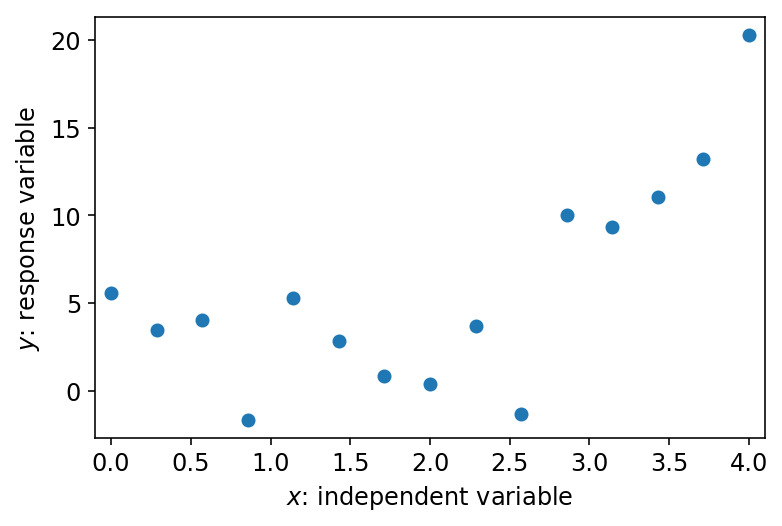

In [34]:
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)

In [0]:
# define functions that use cvxpy to solve the least-squares problem using both a linear and exponential model

def linear_model(x,y):
    theta = Variable()
    b = Variable()
    objective = Minimize(sum_squares(theta*x + b - y))
    prob = Problem(objective)
    result = prob.solve()
    return (theta.value,b.value,result)

def exp_model(x,y):
    theta = Variable()
    b = Variable()
    objective = Minimize(sum_squares(theta*np.exp(x) + b - y))
    prob = Problem(objective)
    result = prob.solve()
    return (theta.value,b.value,result)

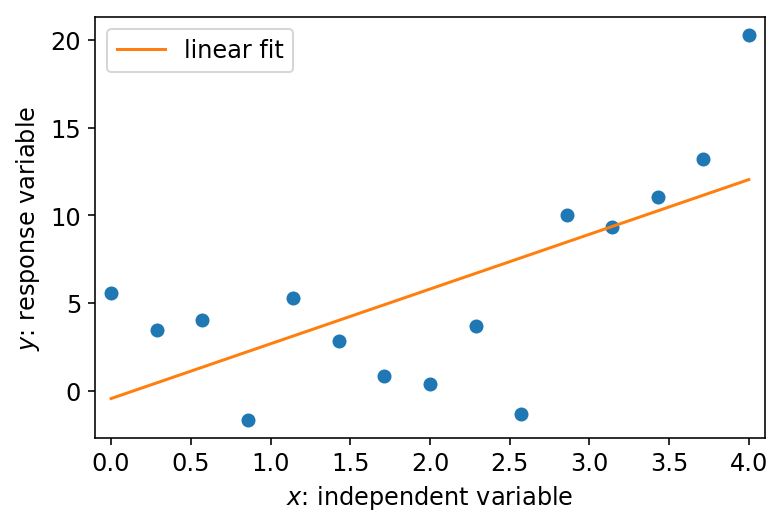

In [36]:
# fit the linear and exponential models using cvxpy
(theta_lin,b_lin,val_lin) = linear_model(x_exp,y_exp)
(theta_fit,b_fit,val_fit) = exp_model(x_exp,y_exp)

# compute model output
y_lin = theta_lin*x_exp + b_lin
y_fit = theta_fit*np.exp(x_exp) + b_fit
y_true = theta_exp*np.exp(x_exp) + b_exp

# plot linear
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.plot(x_exp,y_lin,label='linear fit')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=2,fontsize=12)
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)

In [37]:
print(val_lin)
print(val_fit)

283.6318423667202
122.7961588295


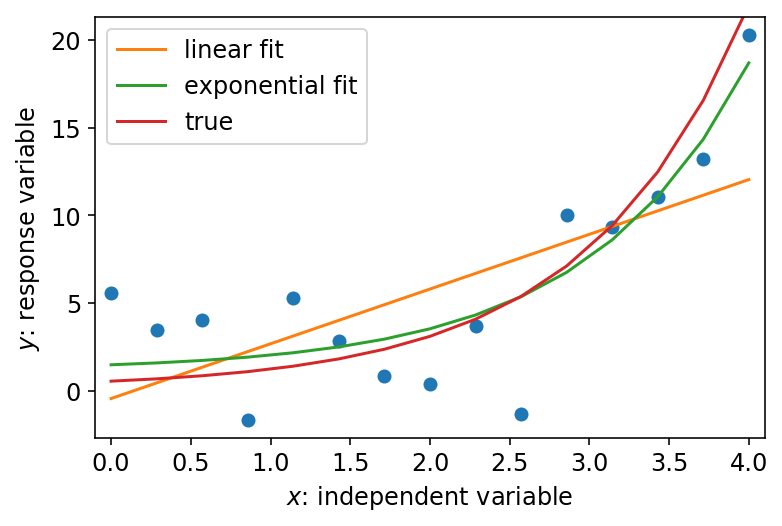

In [38]:
# plot all
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.plot(x_exp,y_lin,label='linear fit')
plt.plot(x_exp,y_fit,label='exponential fit')
plt.plot(x_exp,y_true,label='true')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=2,fontsize=12)
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)